[![Fixel Algorithms](https://i.imgur.com/AqKHVZ0.png)](https://fixelalgorithms.gitlab.io/)

#  Local Outlier Factor

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 1.0.000 | 13/04/2024 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/AIProgram/2024_02/0070AnomalyDetectionLocalOutlierFactor.ipynb)

In [16]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning
from sklearn.datasets import make_moons
from sklearn.neighbors import LocalOutlierFactor

# Miscellaneous
import math
import os
from platform import python_version
import random
import timeit

# Typing
from typing import Callable, Dict, List, Optional, Self, Set, Tuple, Union

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image
from IPython.display import display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout, SelectionSlider
from ipywidgets import interact

## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

Code Notations:

```python
someVar    = 2; #<! Notation for a variable
vVector    = np.random.rand(4) #<! Notation for 1D array
mMatrix    = np.random.rand(4, 3) #<! Notation for 2D array
tTensor    = np.random.rand(4, 3, 2, 3) #<! Notation for nD array (Tensor)
tuTuple    = (1, 2, 3) #<! Notation for a tuple
lList      = [1, 2, 3] #<! Notation for a list
dDict      = {1: 3, 2: 2, 3: 1} #<! Notation for a dictionary
oObj       = MyClass() #<! Notation for an object
dfData     = pd.DataFrame() #<! Notation for a data frame
dsData     = pd.Series() #<! Notation for a series
hObj       = plt.Axes() #<! Notation for an object / handler / function handler
```

### Code Exercise

 - Single line fill

 ```python
 vallToFill = ???
 ```

 - Multi Line to Fill (At least one)

 ```python
 # You need to start writing
 ????
 ```

 - Section to Fill

```python
#===========================Fill This===========================#
# 1. Explanation about what to do.
# !! Remarks to follow / take under consideration.
mX = ???

???
#===============================================================#
```

In [17]:
# Configuration
# %matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# Matplotlib default color palette
lMatPltLibclr = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())


In [18]:
# Constants

FIG_SIZE_DEF    = (8, 8)
ELM_SIZE_DEF    = 50
CLASS_COLOR     = ('b', 'r')
EDGE_COLOR      = 'k'
MARKER_SIZE_DEF = 10
LINE_WIDTH_DEF  = 2


In [19]:
# Courses Packages
import sys
sys.path.append('../')
sys.path.append('../../')
sys.path.append('../../../')
from utils.DataVisualization import PlotScatterData


In [20]:
# General Auxiliary Functions


## Anomaly Detection by Local Outlier Factor (LOF)

This notebook covers _Anomaly Detection_ by utilizing the _Local Outlier Factor_ (LOF) algorithm.

1. Working on synthetic data.
2. Working with the `LocalOutlierFactor` class.
3. Effect of the parameters on the detection.

* <font color='brown'>(**#**)</font> _Anomaly Detection_ can be part of the _pre process_ stage to clean data or the objective by itself.

In [21]:
# Parameters

# Data
numSamples = 500
noiseLevel = 0.1

# Model
numNeighbors        = 30
contaminationRatio  = 0.05


## Generate / Load Data

In this notebook we'll use the [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) data generator.


In [22]:
# Generate Data

mX, vY = make_moons(n_samples = numSamples, noise = noiseLevel)

vX1 = np.linspace(-1.00, -0.50, 3)
vX2 = np.linspace(-0.75, -0.25, 3)

mX = np.concatenate((mX, np.column_stack((vX1, vX2))), axis = 0)

vX1 = np.linspace(1.50, 2.50, 3)
vX2 = np.ones(3)

mX = np.concatenate((mX, np.column_stack((vX1, vX2))), axis = 0)

print(f'The features data shape: {mX.shape}')
print(f'The features data type: {mX.dtype}')


The features data shape: (506, 2)
The features data type: float64


### Plot the Data

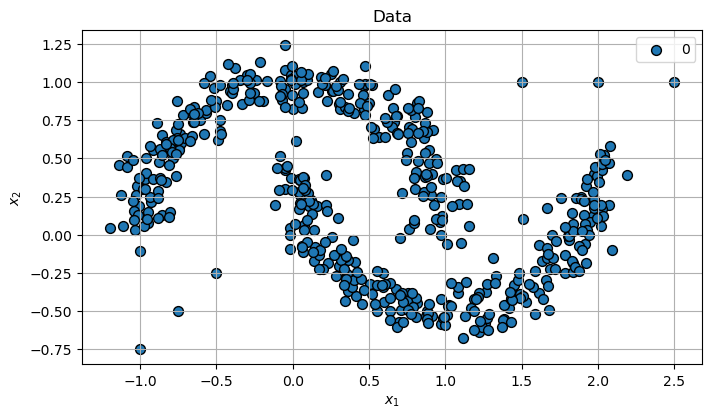

In [23]:
# Plot the Data

hF, hA = plt.subplots(figsize = (8, 8))
hA = PlotScatterData(mX, markerSize = 50, hA = hA)
hA.set_aspect(1)
hA.set_title('Data')

plt.show()

## Applying Outlier Detection - Local Outlier Factor (LOF)

The LOF algorithm basically learns the density of the distance to local neighbors and when the density is much lower than expected it sets the data as an outlier.

* <font color='brown'>(**#**)</font> The LOF is implemented by [`LocalOutlierFactor`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html) the class in SciKit Learn.

In [24]:
# Applying the Model

oLofOutDet = LocalOutlierFactor(n_neighbors = numNeighbors, contamination = contaminationRatio)
vL         = oLofOutDet.fit_predict(mX)
vLofScore  = -oLofOutDet.negative_outlier_factor_

### Plot the Model Results

We can use the model to show the LOF Score.

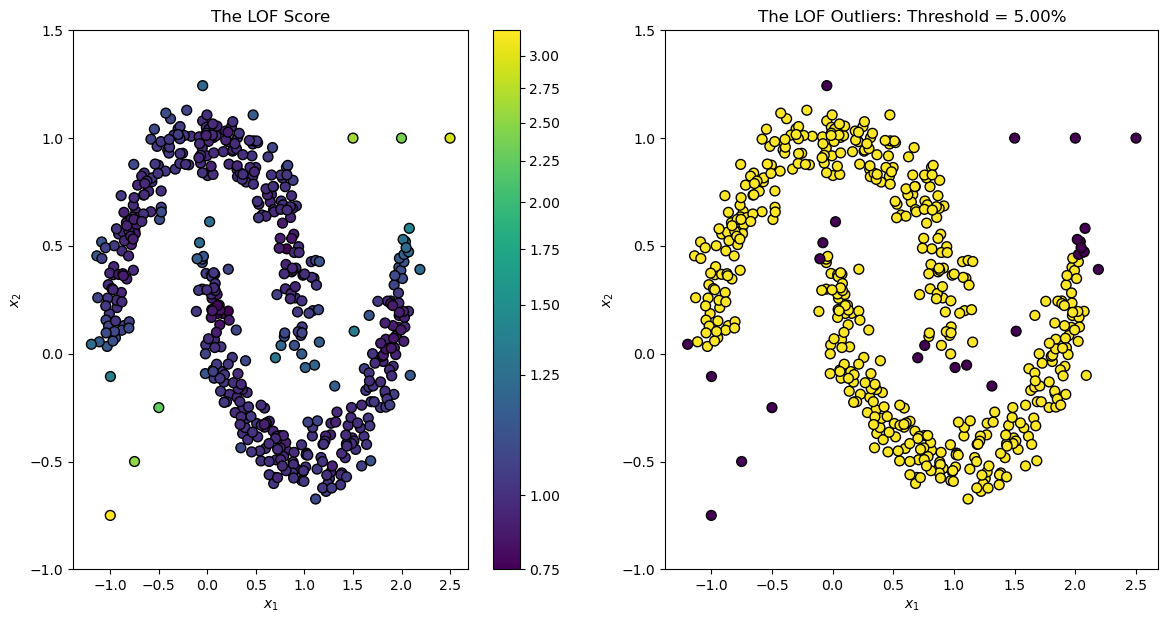

In [25]:
# Plot the Model
from matplotlib.colors import PowerNorm
hF, hA = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 7))

hPathColl = hA[0].scatter(mX[:, 0], mX[:, 1], s = 50, c = vLofScore, norm = PowerNorm(0.5), edgecolors = EDGE_COLOR)
# hA[0].axis('equal')
hA[0].set_ylim((-1, 1.5))
hA[0].set_xlabel('${{x}}_{{1}}$')
hA[0].set_ylabel('${{x}}_{{2}}$')
hA[0].set_title('The LOF Score')

hA[1].scatter(mX[:, 0], mX[:, 1], s = 50, c = vL, edgecolors = EDGE_COLOR)
# hA[1].axis('equal')
hA[1].set_ylim((-1, 1.5))
hA[1].set_xlabel('${{x}}_{{1}}$')
hA[1].set_ylabel('${{x}}_{{2}}$')
hA[1].set_title(f'The LOF Outliers: Threshold = {contaminationRatio:0.2%}')

hF.colorbar(hPathColl, ax = hA[0])

plt.show()

### Analysis of the LOF Score Histogram

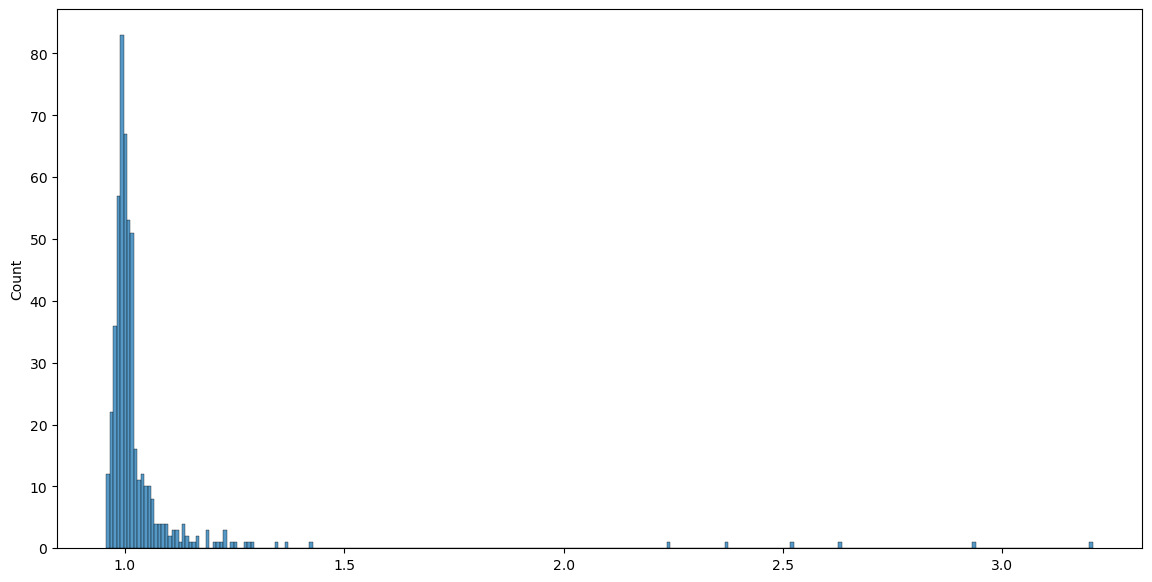

In [26]:
hF, hA = plt.subplots(figsize = (14, 7))

sns.histplot(x = vLofScore, ax = hA)
plt.show()

* <font color='red'>(**?**)</font> Will a change in the `contamination` parameter change the histogram above?
* <font color='green'>(**@**)</font> Think of strategy to have an adaptive threshold of outliers based on the histogram.

## ?
???? use gmm ???

